In [1]:
import pickle
import pandas as pd
import numpy
import re
import os
import numpy as np
import gensim
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# get pickled doc2vec model
with open('clean_df.pkl', 'rb') as f:
    clean_poem_df = pickle.load(f)
    
doc2vec_model = gensim.models.doc2vec.Doc2Vec.load("poem_doc2vec_dbow500.pkl")

In [3]:
clean_poem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15076 entries, 1 to 15651
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   author             15076 non-null  category
 1   title              15076 non-null  object  
 2   content            15076 non-null  object  
 3   line               15076 non-null  object  
 4   length_in_lines    15076 non-null  int64   
 5   lexical_diversity  15076 non-null  float64 
 6   words              15076 non-null  object  
dtypes: category(1), float64(1), int64(1), object(4)
memory usage: 879.8+ KB


In [4]:
poems = clean_poem_df.words.to_list()
# poems = [' '.join(poem).split() for poem in poems]
poems[0]

['philosophic',
 'in',
 'its',
 'complex',
 'ovoid',
 'emptiness',
 'a',
 'skillful',
 'pundit',
 'coined',
 'it',
 'as',
 'a',
 'sort',
 'of',
 'stopgap',
 'doorstop',
 'for',
 'those',
 'quaint',
 'equations',
 'romans',
 'never',
 'dreamt',
 'of',
 'in',
 'form',
 'completely',
 'clever',
 'and',
 'discretea',
 'mirror',
 'come',
 'unsilvered',
 'loose',
 'watch',
 'face',
 'without',
 'the',
 'works',
 'a',
 'hollowed',
 'globe',
 'from',
 'tip',
 'to',
 'toe',
 'unbroken',
 'it',
 'evades',
 'the',
 'grappling',
 'hooks',
 'of',
 'mass',
 'tilts',
 'the',
 'thin',
 'rim',
 'of',
 'no',
 'thing',
 'remains',
 'embryonic',
 'sum',
 'noncogito']

In [5]:
poem_vector=[]

t = 1000

for i in range(len(poems)):
    if i % t == 0:
        print("poem", i, ":", poems[i[:3]])
        print("***")
    poem = poems[i]
    poem_vector.append(doc2vec_model.infer_vector(poem))
    
#save the lines_vector
poem_vector_file = "poem_vector_500.pkl"
with open(poem_vector_file, 'wb') as f:
    pickle.dump((poem_vector), f)

poem 0 : ['philosophic', 'in', 'its', 'complex', 'ovoid', 'emptiness', 'a', 'skillful', 'pundit', 'coined', 'it', 'as', 'a', 'sort', 'of', 'stopgap', 'doorstop', 'for', 'those', 'quaint', 'equations', 'romans', 'never', 'dreamt', 'of', 'in', 'form', 'completely', 'clever', 'and', 'discretea', 'mirror', 'come', 'unsilvered', 'loose', 'watch', 'face', 'without', 'the', 'works', 'a', 'hollowed', 'globe', 'from', 'tip', 'to', 'toe', 'unbroken', 'it', 'evades', 'the', 'grappling', 'hooks', 'of', 'mass', 'tilts', 'the', 'thin', 'rim', 'of', 'no', 'thing', 'remains', 'embryonic', 'sum', 'noncogito']
***
poem 1000 : ['i', 'need', 'them', 'true', 'to', 'life', 'and', 'so', 'i', 'shoot', 'them', 'as', 'many', 'as', 'fill', 'the', 'field', 'at', 'dawn', 'and', 'then', 'fix', 'wires', 'to', 'prop', 'them', 'as', 'if', 'feeding', 'their', 'young', 'or', 'bending', 'to', 'the', 'river', 'why', 'make', 'a', 'little', 'book', 'when', 'they', 'exist', 'lifesized', 'can', 'be', 'etched', 'to', 'stand', 

In [25]:
# store vectors for convenience
X = np.vstack(poem_vector)
print(type(X))

<class 'numpy.ndarray'>


In [29]:
# perform normalization and PCA and output components
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, normalize
X_normalized = pd.DataFrame(normalize(StandardScaler().fit_transform(X)))

pca_99 = PCA(n_components = 0.99)
pca_99.fit(X_normalized)
reduced = pca_99.transform(X_normalized)

X_pc = PCA(n_components = 2).fit_transform(X_normalized)
X_principal = pd.DataFrame(X_pc)
X_principal.columns = ['P1', 'P2']

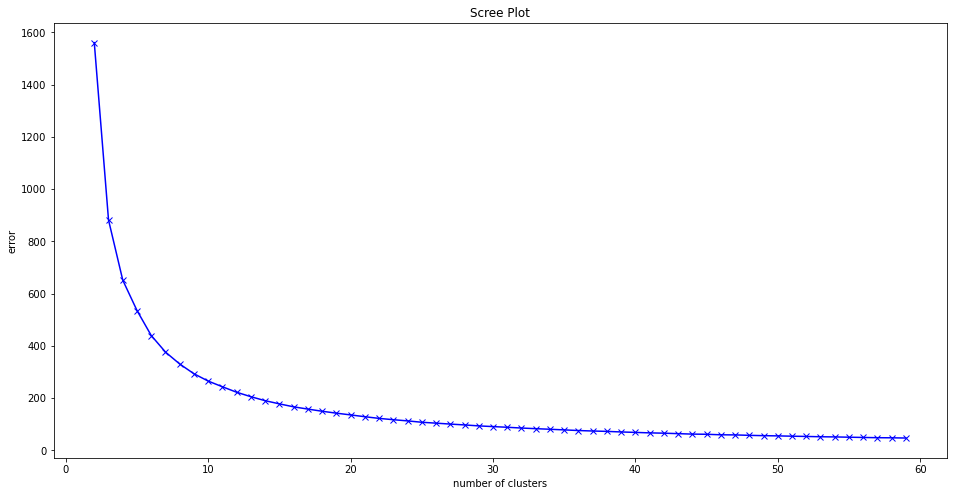

In [31]:
# determine best number of clusters for KMeans Clustering
from sklearn.cluster import KMeans
to_fit = X_pc
error = []
num_cluster_range = range(2,60)
for num_cluster in num_cluster_range:
    k_mean_model = KMeans(n_clusters=num_cluster, init = 'k-means++')
    k_mean_model.fit(to_fit)
    error.append(k_mean_model.inertia_)
plt.figure(figsize=(16,8))
plt.plot(num_cluster_range, error, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.title('Scree Plot')
plt.show()

In [ ]:
# from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# y = clean_poem_df.title
range_n_clusters = range(2,60)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(to_fit)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(to_fit, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Estimated number of clusters: 4
Estimated number of noise points: 14300
Silhouette Coefficient: -0.419


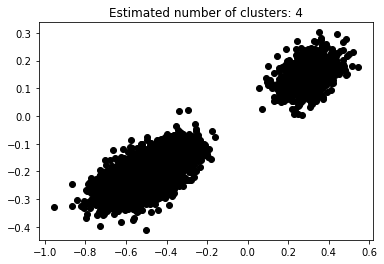

In [33]:
# attempt at density clustering 1
from sklearn.cluster import DBSCAN
from sklearn import metrics

# labels_true = clean_poem_df.author
db = DBSCAN().fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [34]:
# attempt at density clustering 2


In [35]:
db_base = DBSCAN(eps = 0.3, min_samples = 10).fit(X_principal)

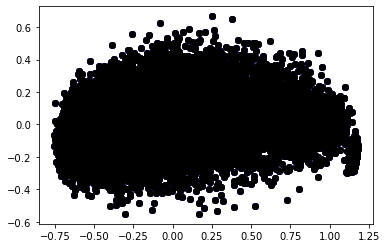

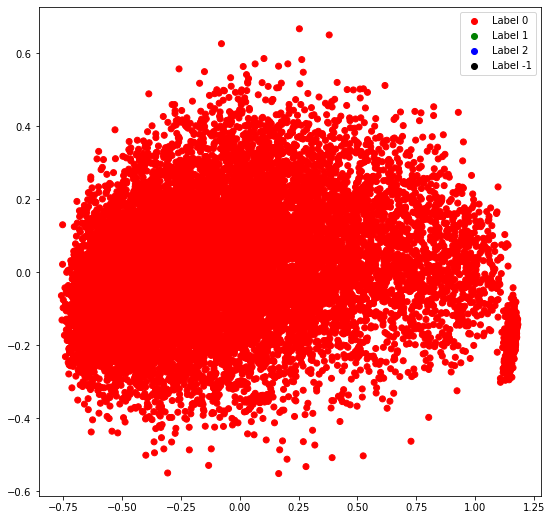

In [36]:
# Building the label to colour mapping
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] = 'k'

labels = db_base.labels_
# Building the colour vector for each data point
cvec = [colours[label] for label in labels]
  
# For the construction of the legend of the plot
r = plt.scatter(X_principal['P1'], X_principal['P2'], color ='r');
g = plt.scatter(X_principal['P1'], X_principal['P2'], color ='g');
b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='b');
k = plt.scatter(X_principal['P1'], X_principal['P2'], color ='k');
  
# Plotting P1 on the X-Axis and P2 on the Y-Axis 
# according to the colour vector defined
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
  
# Building the legend
plt.legend((r, g, b, k), ('Label 0', 'Label 1', 'Label 2', 'Label -1'))
  
plt.show()

In [37]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal)

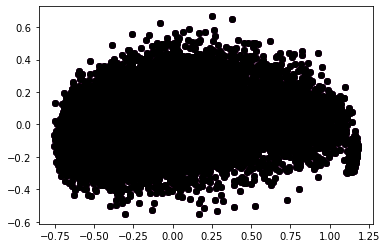

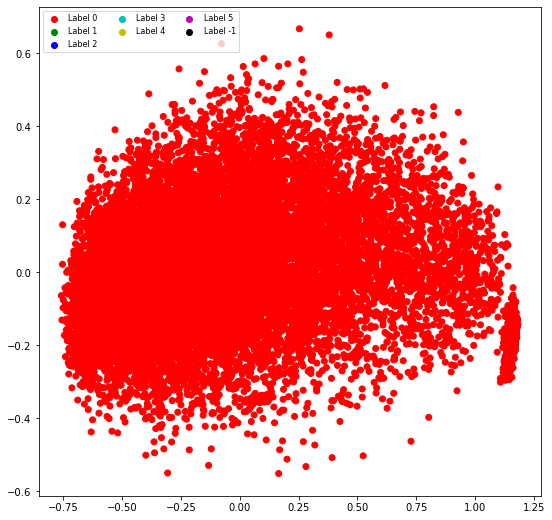

In [38]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] = 'k'
  
cvec = [colours1[label] for label in labels]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]
  
r = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[0])
g = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[1])
b = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[2])
c = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[3])
y = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[4])
m = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[5])
k = plt.scatter(
        X_principal['P1'], X_principal['P2'], marker ='o', color = colors[6])
  
plt.figure(figsize =(9, 9))
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec)
plt.legend((r, g, b, c, y, m, k),
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4',
            'Label 5', 'Label -1'),
           scatterpoints = 1,
           loc ='upper left',
           ncol = 3,
           fontsize = 8)
plt.show()

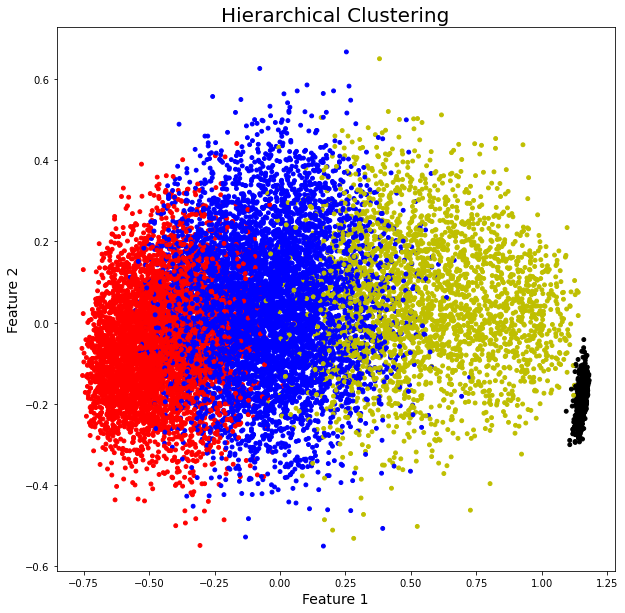

In [39]:
# clustering with hierarchical/agglomerative
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean')
model.fit(X)

X_principal['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(X_principal['P1'],X_principal['P2'],c=X_principal['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [40]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=)

SyntaxError: invalid syntax (<ipython-input-40-921dd7b9ceaf>, line 2)

In [ ]:
print(X.ndim)

In [ ]:
print(X.shape)

In [ ]:
print(X[0].ndim)

In [ ]:
print(X[0].shape)